## Tensor
#### Note: A tensor is a container for data; almost always  numerical data. So, it's a container of numbers.
#### e.g. Matrices: 2D tensors
### Scalars (0D tensors): A tensor that contains only one number is called a scalar (or scalar tensor, or 0D tensor). 
#### In Numpy, a float32 or float64 number is a scalar tensor (or scalar array); a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called rank.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
x = np.array(12)
x

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array(12)

In [2]:
x.ndim

0

### Vector (1D tensors)

In [3]:
x = np.array([12, 3, 6, 15])
x

array([12,  3,  6, 15])

In [4]:
x.ndim

1

### Matrics (2D tensors)

In [5]:
x = np.array([[5, 17, 2, 34, 10],
             [2, 32, 45, 1, 0],
             [8, 70, 3, 13, 91]])
x.ndim

2

### 3D tensors
#### If you pack matrics in a new array, you obtain a 3D tensor.

In [6]:
x = np.array([[[2, 3, 4, 5, 6],
              [0, 1, 2, 1, 4],
             [2, 10, 4, 12, 9]],
              [[4, 3, 12, 9, 1],
              [2, 1, 3, 2, 10],
              [12, 13, 10, 9, 8]],
             [[1, 2, 3, 4, 9],
             [21, 20, 10, 5, 9],
             [10, 9, 8, 10, 9]]])

In [7]:
x.ndim

3

In [8]:
x.shape

(3, 3, 5)

In [9]:
x.dtype

dtype('int64')

### Check MNIST Dataset

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
print(train_images.ndim)

3


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
print(train_images.dtype)

uint8


#### So, MNIST dataset is a 3D tensor of 8-bit integers. The training dataset is an array of 60,000 matrices of (28 x 28) integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.
#### Display one such Image:

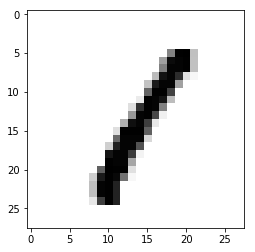

In [14]:
digit = train_images[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy
#### Selecting specific elements in a tensor is called tensor slicing.

In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [16]:
## Equivalent to
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [17]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [18]:
# Select 14x14 pixels in the bottom-right corner of all Images
my_slices = train_images[:, 14:, 14:]
my_slices.shape

(60000, 14, 14)

In [19]:
# Crop the images to patched 14x14 pixels in the middle
my_slices = train_images[:, 7:-7, 7:-7]
my_slices.shape

(60000, 14, 14)

### Notation of Data Batches

In [20]:
# one batch of MNIST digits, with batch size 64:
batch = train_images[:64] # so next batch:- # batch = train_images[64:128]
batch.shape               # nth batch: batch = train_images[64*n: 64*(n+1)]

(64, 28, 28)

### Real world examples of data tensors
1. Vector data -- 2D tensors of shape (samples, features)
2. Timeseries data or sequence data -- 3D tensors of shape (samples, timesteps, features)
3. Images -- 4D tensors (samples, height, width, channes) or (samples, channels, height, width)
4. Video -- 5D tensors (samples, frames, height, width, channels)
#### Examples:
##### Vector data: Dataset of people -- where we consider each person's age, height, and weight. So each person can be described by 3 values (features), and thus the entire dataset of 10,000 people can be stored in a 2D tensor of shape (10000, 3).
##### Timeseries or sequence data: A dataset of stock price -- Consider every minute we store the current price, highest and lowest prices of last minute. Thus every minute is encoded as a 3D vector, and entire day (390 minutes) of trading encoded as a 2D tensor of shape (390, 3), and 250 days data can be stored in a 3D tensor of shape (250, 390, 3).
##### Image data: A batch of 128 grayscale image of size (256x256) can be stored as a 4D tensor of shape (128, 256, 256, 1), where as for color images 4D tensor shape is (128, 256, 256, 3)
##### Video data: a 60 seconds 256x256 color video clip sampled as 4 frames per second would have 240 frames. A batch of 4 such video clips can be stored in a 5D tensor of shape (4, 240, 256, 256, 3).